# Neural Networks

## Building the Neural Networks

Use the following dataset https://www.kaggle.com/datasets/anmolkumar/health-insurance-cross-sell-prediction?select=train.csv to build three different neural networks using

> different layers


> activation functions


> number of neurons per layer


> number of layers











### Data pre-processing

In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [3]:
import pandas as pd
train = pd.read_csv("/content/drive/MyDrive/VNP/Labs/Lab4/train.csv")

In [ ]:
 #pd.set_option('display.max_columns', None)

In [4]:
train.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [ ]:
train.drop(['id'], axis=1, inplace=True)

In [ ]:
train

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0
...,...,...,...,...,...,...,...,...,...,...,...
381104,Male,74,1,26.0,1,1-2 Year,No,30170.0,26.0,88,0
381105,Male,30,1,37.0,1,< 1 Year,No,40016.0,152.0,131,0
381106,Male,21,1,30.0,1,< 1 Year,No,35118.0,160.0,161,0
381107,Female,68,1,14.0,0,> 2 Years,Yes,44617.0,124.0,74,0


In [ ]:
train.isnull().sum()

Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

<Axes: >

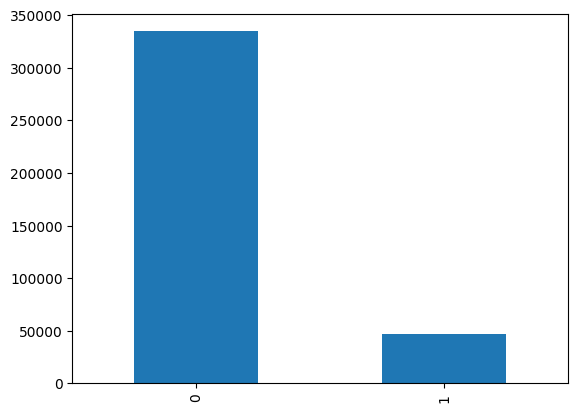

In [ ]:
train['Response'].value_counts().plot.bar()

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
columns=['Gender', 'Vehicle_Age', 'Vehicle_Damage']
for column in columns:
  train[column] = le.fit_transform(train[column])

In [ ]:
train

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,44,1,28.0,0,2,1,40454.0,26.0,217,1
1,1,76,1,3.0,0,0,0,33536.0,26.0,183,0
2,1,47,1,28.0,0,2,1,38294.0,26.0,27,1
3,1,21,1,11.0,1,1,0,28619.0,152.0,203,0
4,0,29,1,41.0,1,1,0,27496.0,152.0,39,0
...,...,...,...,...,...,...,...,...,...,...,...
381104,1,74,1,26.0,1,0,0,30170.0,26.0,88,0
381105,1,30,1,37.0,1,1,0,40016.0,152.0,131,0
381106,1,21,1,30.0,1,1,0,35118.0,160.0,161,0
381107,0,68,1,14.0,0,2,1,44617.0,124.0,74,0


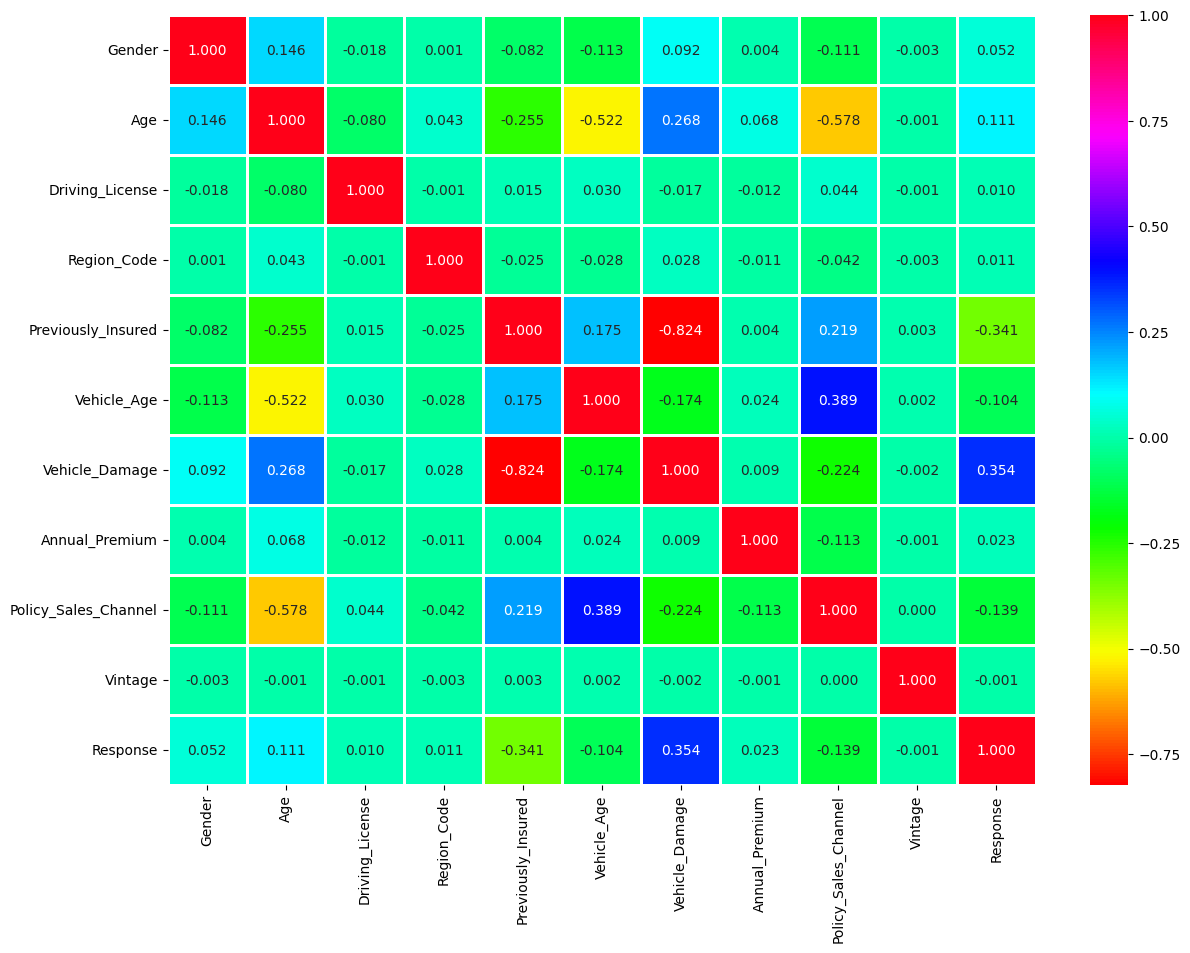

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(14,10))
sns.heatmap(train.corr(),annot=True,cmap='hsv',fmt='.3f',linewidths=2)
plt.show()


In [ ]:
train['Response'].value_counts()

0    334399
1     46710
Name: Response, dtype: int64

In [ ]:
train = pd.concat([train[train['Response'] == 1], train[train['Response'] == 0][:46710]], axis=0)

In [ ]:
train['Response'].value_counts()

1    46710
0    46710
Name: Response, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(train.drop(['Response'], axis=1), train['Response'], test_size=0.33, random_state=42)

In [ ]:
X_train.shape

(62591, 10)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [ ]:
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
len(X_train[0])

10

### Neural Network 1

In [ ]:
from keras.models import Sequential
from keras.layers import Dense

In [ ]:
model1 = Sequential()
model1.add(Dense(32, activation='relu'))
model1.add(Dense(16, activation='relu'))
model1.add(Dense(8, activation='relu'))
model1.add(Dense(1, activation='sigmoid'))

#### Optimize number of epochs and batch size for NN1

In [ ]:
import keras

In [ ]:
model1.compile(loss=keras.losses.BinaryCrossentropy(),
               optimizer=keras.optimizers.Adam(), metrics=[keras.metrics.Precision(), keras.metrics.Recall()])

In [ ]:
history = model1.fit(X_train, Y_train, epochs=15, batch_size=50,  verbose=1, validation_split=0.2)

Epoch 1/15
1002/1002 [==============================] - 5s 4ms/step - loss: 0.4520 - precision: 0.7079 - recall: 0.9475 - val_loss: 0.4369 - val_precision: 0.7542 - val_recall: 0.8742
Epoch 2/15
1002/1002 [==============================] - 3s 3ms/step - loss: 0.4338 - precision: 0.7200 - recall: 0.9425 - val_loss: 0.4288 - val_precision: 0.7260 - val_recall: 0.9585
Epoch 3/15
1002/1002 [==============================] - 3s 3ms/step - loss: 0.4319 - precision: 0.7263 - recall: 0.9327 - val_loss: 0.4293 - val_precision: 0.7199 - val_recall: 0.9691
Epoch 4/15
1002/1002 [==============================] - 2s 2ms/step - loss: 0.4308 - precision: 0.7290 - recall: 0.9277 - val_loss: 0.4282 - val_precision: 0.7589 - val_recall: 0.8802
Epoch 5/15
1002/1002 [==============================] - 3s 3ms/step - loss: 0.4302 - precision: 0.7304 - recall: 0.9214 - val_loss: 0.4255 - val_precision: 0.7262 - val_recall: 0.9575
Epoch 6/15
1002/1002 [==============================] - 3s 3ms/step - loss: 0.42

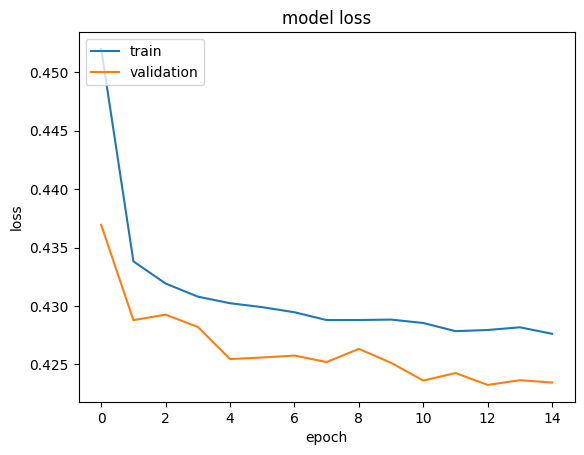

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

### Neural Network 2

In [ ]:
model2 = Sequential()
model2.add(Dense(128, input_dim=10, kernel_initializer='uniform', activation='relu'))
model2.add(Dense(64, activation='relu'))
model2.add(Dense(32, activation='relu'))
model2.add(Dense(32, activation='relu'))
model2.add(Dense(1, activation='sigmoid'))


#### Optimize number of epochs and batch size for NN2

In [ ]:
model2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
history = model2.fit(X_train, Y_train, epochs=10, batch_size=30,  verbose=1, validation_split=0.2)

Epoch 1/10
1670/1670 [==============================] - 10s 6ms/step - loss: 0.4272 - accuracy: 0.7928 - val_loss: 0.4262 - val_accuracy: 0.7990
Epoch 2/10
1670/1670 [==============================] - 6s 3ms/step - loss: 0.4271 - accuracy: 0.7936 - val_loss: 0.4239 - val_accuracy: 0.8010
Epoch 3/10
1670/1670 [==============================] - 5s 3ms/step - loss: 0.4267 - accuracy: 0.7942 - val_loss: 0.4242 - val_accuracy: 0.7979
Epoch 4/10
1670/1670 [==============================] - 6s 4ms/step - loss: 0.4266 - accuracy: 0.7942 - val_loss: 0.4233 - val_accuracy: 0.8001
Epoch 5/10
1670/1670 [==============================] - 4s 2ms/step - loss: 0.4263 - accuracy: 0.7936 - val_loss: 0.4237 - val_accuracy: 0.8007
Epoch 6/10
1670/1670 [==============================] - 4s 3ms/step - loss: 0.4262 - accuracy: 0.7944 - val_loss: 0.4237 - val_accuracy: 0.8001
Epoch 7/10
1670/1670 [==============================] - 6s 4ms/step - loss: 0.4262 - accuracy: 0.7934 - val_loss: 0.4246 - val_accuracy

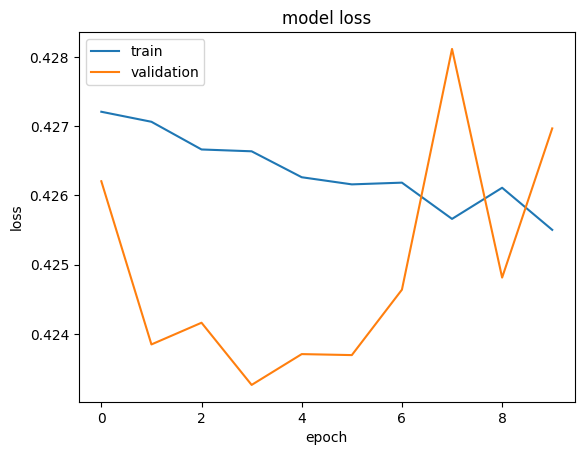

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

### Neural Network 3

In [ ]:
model3 = Sequential()
model3.add(Dense(128, input_dim=10, kernel_initializer='uniform', activation='relu'))
model3.add(Dense(64, activation='relu'))
model3.add(Dense(32, activation='relu'))
model3.add(Dense(32, activation='relu'))
model3.add(Dense(1, activation='sigmoid'))



#### Optimize number of epochs and batch size for NN3

In [ ]:
model3.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
history = model3.fit(X_train, Y_train, epochs=15, batch_size=50,  verbose=1, validation_split=0.2)

Epoch 1/15
1002/1002 [==============================] - 7s 4ms/step - loss: 0.4503 - accuracy: 0.7837 - val_loss: 0.4284 - val_accuracy: 0.8009
Epoch 2/15
1002/1002 [==============================] - 2s 2ms/step - loss: 0.4333 - accuracy: 0.7908 - val_loss: 0.4267 - val_accuracy: 0.8033
Epoch 3/15
1002/1002 [==============================] - 3s 3ms/step - loss: 0.4322 - accuracy: 0.7917 - val_loss: 0.4268 - val_accuracy: 0.7998
Epoch 4/15
1002/1002 [==============================] - 3s 3ms/step - loss: 0.4314 - accuracy: 0.7895 - val_loss: 0.4268 - val_accuracy: 0.8019
Epoch 5/15
1002/1002 [==============================] - 4s 4ms/step - loss: 0.4309 - accuracy: 0.7917 - val_loss: 0.4255 - val_accuracy: 0.7999
Epoch 6/15
1002/1002 [==============================] - 4s 4ms/step - loss: 0.4304 - accuracy: 0.7917 - val_loss: 0.4302 - val_accuracy: 0.7981
Epoch 7/15
1002/1002 [==============================] - 3s 3ms/step - loss: 0.4296 - accuracy: 0.7922 - val_loss: 0.4237 - val_accuracy:

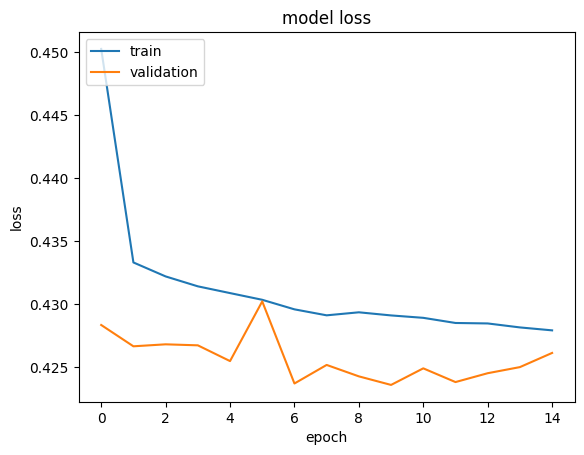

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

## Evaluate the three NNs

In [ ]:
y_pred1 = model1.predict(X_test)
from sklearn.metrics import accuracy_score
ac1=accuracy_score(Y_test.round(), y_pred1.round())
print('accuracy of the model: ',ac1)

964/964 [==============================] - 5s 5ms/step
accuracy of the model:  0.7935061143728308


In [ ]:
y_pred2 = model2.predict(X_test)
from sklearn.metrics import accuracy_score
ac2=accuracy_score(Y_test.round(), y_pred2.round())
print('accuracy of the model: ',ac2)

964/964 [==============================] - 4s 4ms/step
accuracy of the model:  0.7905867851698076


In [ ]:
y_pred3 = model3.predict(X_test)
from sklearn.metrics import accuracy_score
ac3=accuracy_score(Y_test.round(), y_pred2.round())
print('accuracy of the model: ',ac3)

964/964 [==============================] - 5s 4ms/step
accuracy of the model:  0.7905867851698076


## Results analysis